<a href="https://colab.research.google.com/github/luongvantuit/learn-ai-with-python/blob/master/dbscan/BTTH2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class DBScan:
    def __init__(self, epsilon, minpts, input_data):
        self.epsilon = epsilon
        self.minpts = minpts
        self.input_data = np.array(input_data)
        self.visited = np.zeros(len(input_data), dtype=bool)
        self.cluster_labels = -1 * np.ones(len(input_data), dtype=int)
        self.cluster_id = 0

    def region_query(self, point_index):
        neighbors = []
        for i in range(len(self.input_data)):
            if np.linalg.norm(self.input_data[point_index] - self.input_data[i]) <= self.epsilon:
                neighbors.append(i)
        return neighbors

    def expand_cluster(self, point_index, neighbors):
        self.cluster_labels[point_index] = self.cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_index = neighbors[i]
            if not self.visited[neighbor_index]:
                self.visited[neighbor_index] = True
                new_neighbors = self.region_query(neighbor_index)
                if len(new_neighbors) >= self.minpts:
                    neighbors += new_neighbors
            if self.cluster_labels[neighbor_index] == -1:
                self.cluster_labels[neighbor_index] = self.cluster_id
            i += 1

    def fit(self):
        for point_index in range(len(self.input_data)):
            if not self.visited[point_index]:
                self.visited[point_index] = True
                neighbors = self.region_query(point_index)
                if len(neighbors) >= self.minpts:
                    self.expand_cluster(point_index, neighbors)
                    self.cluster_id += 1
                else:
                    self.cluster_labels[point_index] = -1  # Noise
        return self.cluster_labels

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Step 1: Load the data
data_path = '/content/drive/My Drive/Machine Learning/DBScan/Sales_Transactions_Dataset_Weekly.csv'  # Replace with the correct path
sales_data = pd.read_csv(data_path)

In [4]:
# Step 2: Extract transaction data for weeks (columns "W0" to "W51")
weekly_data = sales_data.iloc[:, 1:53].values  # Assuming columns 1 to 52 are "W0" to "W51"

In [5]:
# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(weekly_data)

In [6]:
# Step 4: Apply DBScan
epsilon = 2.5  # This is a starting point; you may adjust it as needed
minpts = 5     # Minimum points for a dense region

dbscan = DBScan(epsilon=epsilon, minpts=minpts, input_data=scaled_data)
cluster_labels = dbscan.fit()

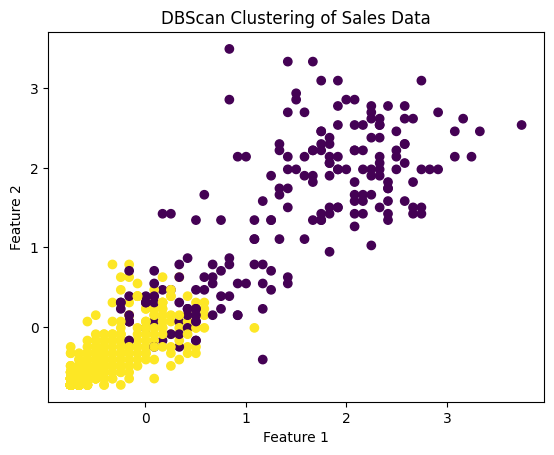

Cluster labels: [ 0  0  0  0  0  0  0  0  0 -1 -1  0  0 -1 -1 -1 -1 -1 -1  0  0  0  0 -1
 -1  0 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0 -1
 -1  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1  0  0 -1 -1 -1  0  0  0  0 -1  0  0  0  0 -1 -1  0 -1  0  0  0 -1 -1
  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0
  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  

In [7]:
# Step 5: Visualize the result
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('DBScan Clustering of Sales Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print cluster results
print("Cluster labels:", cluster_labels)